<h1>The Sparks Foundation </h1>

<h2>Name-Dhruv Kothari</h2>

 Data Science and Bussiness analyst

<h2>Task-1  :Prediction using Supervised ML</h2>

<h3><b>Importing Libraries</b></h3>

In [24]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


<h3><b>Importing CSV file into Dataframe as Data Set<h/3></b>

In [25]:
data=pd.read_csv('task1.csv')
print('DATA LOADED')

DATA LOADED


In [26]:
data.head(4)

,Hours,Scores
0,2.1,21
1,5.1,47
2,3.2,27
3,8.5,75


<h3> Exploring the Dataset </h3>

In [27]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,4.996000,51.480000
std,2.542879,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
rows=len(data.axes[0])

cols=len(data.axes[1])

In [29]:
print('Number of rows--'+str(rows))

print('Number of columns--'+str(cols))

Number of rows--25
Number of columns--2


In [30]:
#checking if thers is any null value in the dataset
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

In [31]:
data.corr()  #correlatin

,Hours,Scores
Hours,1.000000,0.977263
Scores,0.977263,1.000000


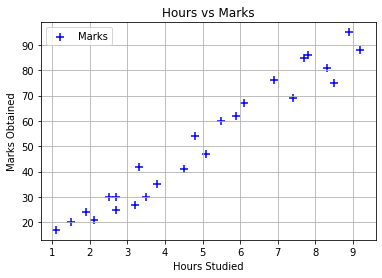

In [32]:
x=data['Hours']
y=data['Scores']
plt.scatter(x,y,label='Marks',color='blue',marker='+',s=70)

plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')

plt.title('Hours vs Marks')

plt.legend()
plt.grid()
plt.show()

<b><h3>Pair Plot</h3></b>

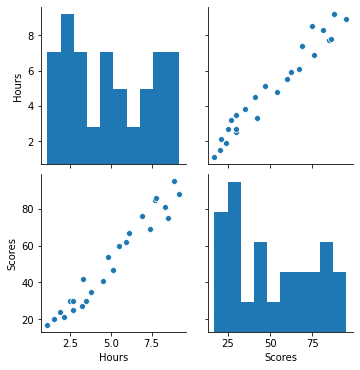

In [33]:
sn.pairplot(data)
plt.show()

<b><h3>Dist Plot</h3></b>

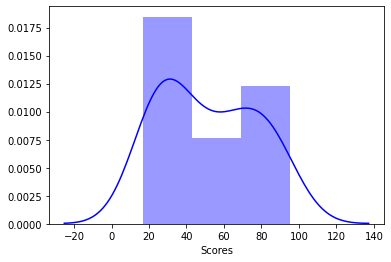

In [34]:
sn.distplot(data['Scores'],color="blue")
plt.show()

In [35]:
print('Average Percentage Score ',data['Scores'].mean())

Average Percentage Score  51.48


<AxesSubplot:xlabel='Hours'>

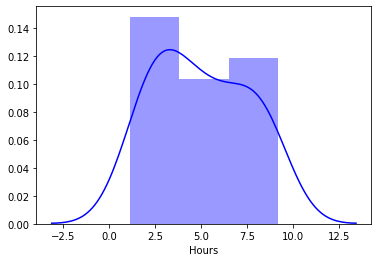

In [36]:
sn.distplot(data['Hours'],color='blue')

In [37]:
print('Average Study Hours',data['Hours'].mean())

Average Study Hours 4.9959999999999996


<b><h3>Heat Map</h3></b>

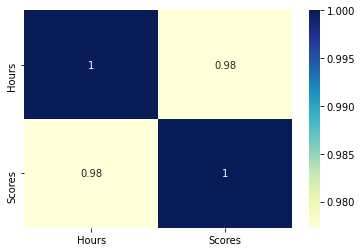

In [38]:
sn.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.show()

<b><h3>Spliting the data into Train and Test (Train=70% and Test=30%)
                                            

In [39]:
x=data[['Hours']].values
y=data[['Scores']].values

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
training=LinearRegression()
training.fit(x_train,y_train)
print('Training Completed Succssfully')

Training Completed Succssfully


<h3><b>Plotting the Regression Line</b></h3>

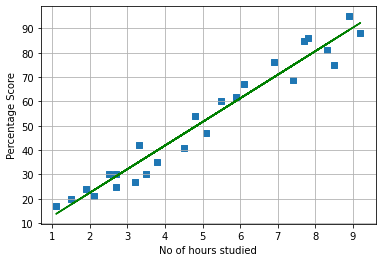

In [42]:
line=training.coef_*x+training.intercept_
plt.scatter(x,y,marker="s")
plt.plot(x,line,c="green")
plt.xlabel("No of hours studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

<h3><b>Predicting the Score</h3></b3>

In [43]:
print("Training Score")
print(training.score(x_train,y_train))
print("Test Score")
print(training.score(x_test,y_test))

Training Score
0.9515927547333431
Test Score
0.9567514143513516


In [44]:
y_pred=training.predict(x_test)
y_pred

array([[17.66079222],
       [34.13484581],
       [74.8354488 ],
       [27.35141198],
       [60.29951916],
       [39.94921767],
       [21.53704012],
       [78.71169671]])

<h3><b>Wat willl be the score if student studies for 9.25 hours a day </h3></b>

In [45]:
hrs=9.25
pred=training.predict([[hrs]])
print("No of hours studies",format(hrs))
print("Predicted Score",format(pred[0]))

No of hours studies 9.25
Predicted Score [92.76309536]


<h3><b>If the student studeis for 9.25 hours the score will be 92.76309536 </b></h3>

<h3><b>Evaluating Model </b></h3>

In [46]:
from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 4.2948815115878745
Mean squared error 23.00216573272413
Root Mean Squared error 4.796057311242656
